## Keras

Keras это высокоуровневая обертка над tensorflow. Но в текущих реализациях библиотеке tf они живут очень рядом. 
Когда мы собираем свои нейронки мы берем уже готовые слои из keras и добавляем что-то свое, если нам требуется.
Но keras можно использовать без явного использования TF пытаясь свести задачу к fit-predict.


### Sequential
Самое простое, что мы можем сделать это собирать слои последовательно друг за другом - займемся же этим!

In [2]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential, layers as L # подгружаем нужные модули. 
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [3]:
# в keras лежит несколько наборов данных. Для примера возьмем fashion_mnist - как mnist, но про предметы одежды :)
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

X_train = X_train/ 255.
X_val = X_val/ 255.
X_test = X_test/ 255.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

'T-shirt/top'

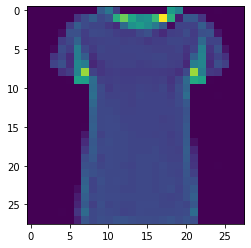

In [4]:
plt.imshow(X_train[2])
class_names[y_train[2]]

In [5]:
X_train[0,:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.1254902 , 0.14509804,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.34509804, 0.43921569,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00784314, 0.        , 0.00784314, 0.00784314,
        0.        , 0.    

In [8]:
y_train

array([5, 0, 0, ..., 6, 6, 1], dtype=uint8)

In [7]:
# для того, чтобы учить через cross_entropy нам нужно сделать OHE таргетам. И эта функция есть в keras!
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)
y_val_ohe = to_categorical(y_val)


In [9]:
## Первая простая нейронка

tf.random.set_seed(42) # фиксируем random_seed

model = Sequential(name = 'first_try')
model.add(L.Input(shape = (28,28))) # входной нейрон с данными. Его обычно можно опускать, сразу передавая 
# в нейрон размерность. Но Dense ячейки не умеют работать с картинками, поэтому оставляем Input
model.add(L.Flatten()) # разворачиваем картинку в вектор
model.add(L.Dense(100,  kernel_initializer='random_normal',name='First')) # можно именовать и потом брать слои по именам
model.add(L.ReLU()) # добавляем активацию
model.add(L.Dense(10, kernel_initializer = 'random_normal',name='Output'))
model.add(L.Softmax())
opt = keras.optimizers.Adam(learning_rate=1e-4) # так же нам нужно указать оптимайзер
model.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) # и собрать нашу модель, указав метрики,loss и оптимизатор


history1 = model.fit(X_train,y_train_ohe,batch_size=500,epochs=2,validation_data = (X_val,y_val_ohe))
# и процесс обучения. Задаем количество эпох, размер батча и валидационную часть наших данных


Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 1s 21us/sample - loss: 1.8986 - categorical_accuracy: 0.4763 - val_loss: 1.4738 - val_categorical_accuracy: 0.6307
Epoch 2/2
50000/50000 [==============================] - 0s 10us/sample - loss: 1.2020 - categorical_accuracy: 0.6655 - val_loss: 1.0251 - val_categorical_accuracy: 0.6802


In [10]:
tf.__version__

'2.1.0'

In [14]:
history1.history

{'loss': [1.8986167120933533, 1.2020430505275725],
 'categorical_accuracy': [0.47632, 0.66554],
 'val_loss': [1.4737698197364808, 1.025083103775978],
 'val_categorical_accuracy': [0.6307, 0.6802]}

In [22]:
history1.history

{'loss': [1.8986167120933533, 1.2020430505275725],
 'categorical_accuracy': [0.47632, 0.66554],
 'val_loss': [1.4737698197364808, 1.025083103775978],
 'val_categorical_accuracy': [0.6307, 0.6802]}

In [7]:
# Эту же модель можно записать чуть в меньшее количество строчек кода
model = Sequential(name = 'first_try')
model.add(L.Input(shape = (28,28))) 
model.add(L.Flatten()) 
model.add(L.Dense(100,  kernel_initializer='random_normal',name='First',activation='relu')) # можно именовать и потом брать слои по именам
model.add(L.Dense(10, kernel_initializer = 'random_normal',name='Output',activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=1e-4) 
model.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) 

history1 = model.fit(X_train,y_train_ohe,batch_size=500,epochs=2,validation_data = (X_val,y_val_ohe))


Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 1s 15us/sample - loss: 1.8141 - categorical_accuracy: 0.4979 - val_loss: 1.3973 - val_categorical_accuracy: 0.6449
Epoch 2/2
50000/50000 [==============================] - 0s 8us/sample - loss: 1.1440 - categorical_accuracy: 0.6720 - val_loss: 0.9782 - val_categorical_accuracy: 0.6839


In [15]:
?L.Dense

Из приятного - все в таком подходе можно кастомизировать под себя!
Но пока продолжим рассмотрение о следующем подходе сборки моделей.
Класс Sequential не дает нам вообще никакой гибкости, позволяя набирать слои только последовательно.
Что же у нас есть новый герой  - Model.
Он позволяет собирать сетки практически любой архитектуры

In [17]:
from tensorflow.keras import Model  # подгружаем нужные модули. 

In [18]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28)) # задаем вход
x = L.Flatten()(input_tensor)# применение нейрона к входу
x = L.Dense(100, kernel_initializer=init, activation=act)(x) # повторяем всю логику сколько нам надо раз
x = L.Dense(100, kernel_initializer=init, activation=act)(x)
output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model = keras.Model(input_tensor, output_tensor) # Keras под капотом сам собирает граф.
# Если он может получить из входа выхода то вы великолепны.

model.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) 

In [19]:
history = model.fit(X_train,y_train_ohe,batch_size=500,epochs=2,validation_data = (X_val,y_val_ohe))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 1s 20us/sample - loss: 1.7316 - categorical_accuracy: 0.4919 - val_loss: 1.1618 - val_categorical_accuracy: 0.6287
Epoch 2/2
50000/50000 [==============================] - 1s 12us/sample - loss: 0.9691 - categorical_accuracy: 0.6527 - val_loss: 0.8632 - val_categorical_accuracy: 0.6665


Такой подход позволяет делать практически любой гибкости нейронки. Как пример - двухголовая!

In [21]:
input_1 = L.Input(shape=(28, 28),name='Input_1')
input_2 = L.Input(shape=(28, 28),name='Input_2')

x1 = L.Flatten()(input_1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x1)

x2 = L.Flatten()(input_2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x2)

x = L.concatenate([x1, x2]) # Волшебное слово, которое позволяет нам соеденять несколько потоков наших данных
output = L.Dense(10, kernel_initializer=init, activation='softmax',name='out')(x)

model = keras.Model([input_1, input_2], output)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
Input_2 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           Input_1[0][0]                    
__________________________________________________________________________________________________
flatten_5 (Flatten)             (None, 784)          0           Input_2[0][0]                    
____________________________________________________________________________________________

In [22]:
model.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) 

In [23]:
history = model.fit([X_train,X_train],[y_train_ohe,..,..],batch_size=500,epochs=2,validation_data = ([X_val,X_val],y_val_ohe))

Train on 50000 samples, validate on 10000 samples
Epoch 1/2
50000/50000 [==============================] - 1s 29us/sample - loss: 1.3629 - categorical_accuracy: 0.5865 - val_loss: 0.8267 - val_categorical_accuracy: 0.6792
Epoch 2/2
50000/50000 [==============================] - 1s 20us/sample - loss: 0.7145 - categorical_accuracy: 0.7403 - val_loss: 0.6616 - val_categorical_accuracy: 0.7659


In [42]:
# history = model.fit({'Input_1':X_train,'Input_2':X_train,'out':y_train_ohe},batch_size=500,epochs=2,validation_data = ([X_val,X_val],y_val_ohe))

In [24]:
# нужно для винды, если не видит путь до graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from tensorflow.keras.utils import plot_model


In [25]:
plot_model(model) # можно нарисовать модельку

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


## 4.2 Несколько выходов и функций потерь

In [43]:
init = 'uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28))

x = L.Flatten()(input_tensor)
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x)

output_1 = L.Dense(1, kernel_initializer=init, activation='sigmoid',name='gender')(x1)
output_2 = L.Dense(10, kernel_initializer=init, activation='softmax',name='income')(x2)
output_3 = L.Dense(1, kernel_initializer=init,name='age')(x3)

model = keras.Model(input_tensor, [output_1, output_2, output_3])

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_16 (Flatten)            (None, 784)          0           input_13[0][0]                   
__________________________________________________________________________________________________
dense_40 (Dense)                (None, 100)          78500       flatten_16[0][0]                 
__________________________________________________________________________________________________
dense_41 (Dense)                (None, 100)          78500       flatten_16[0][0]                 
____________________________________________________________________________________________

In [21]:
# чтобы модель не переобучилась под самую большую функцию потерь
# их можно взвесить
model.compile(optimizer='adam', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
                                    loss_weights=[0.25, 1., 10.])


# если дали выходам имена, можно вот так: 

model.compile(optimizer='adam',

              loss={'age': 'mse',
                    'income': 'categorical_crossentropy',
                    'gender': 'binary_crossentropy'},
                    
              loss_weights={'age': 0.25,
                            'income': 1.,
                            'gender': 10.})

Помните статью про то, как люди рисовали функции потерь? [Теперь появилась галерея!](https://losslandscape.com/gallery/) Есть подход как skip-connection, он сильно меняет нашу функцию.

![](https://i.stack.imgur.com/UDvbg.png)

Такую модель нельзя собрать через `Sequence`-стиль, но можно через функциональный стиль. Давайте попробуем сделать это. Заодно посмотрим насколько сильно в нашей ситуации будет меняться траектория обучения. (Сравним обычный 6-ти слойный персептрон и с прокидыванием инфы, например со 2 слоя на 5ый). Ну и также сразу поэксперементируем с функциями активаций и batchnorm.

In [29]:
## Соберите с батчнормом и релу
# history_simple_BN_and_init


init = 'he_uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28)) # задаем вход
x = L.Flatten()(input_tensor)# применение нейрона к входу
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x1 = L.BatchNormalization()(x1)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x2) # повторяем всю логику сколько нам надо раз
x4 = L.Dense(100, kernel_initializer=init, activation=act)(x3)
x4 = L.BatchNormalization()(x4)
x5 = L.Dense(100, kernel_initializer=init, activation=act)(x4)
output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

simple_BN_and_init = keras.Model(input_tensor, output_tensor) # Keras под капотом сам собирает граф.
# Если он может получить из входа выхода то вы великолепны.

simple_BN_and_init.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) 

history_simple_BN_and_init = simple_BN_and_init.fit(X_train,y_train_ohe,
                                                    batch_size=500,
                                                    epochs=100,validation_data = (X_val,y_val_ohe))


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 1s 14us/sample - loss: 1.5032 - categorical_accuracy: 0.5423 - val_loss: 1.1158 - val_categorical_accuracy: 0.6625
Epoch 2/100
50000/50000 [==============================] - 0s 9us/sample - loss: 1.0000 - categorical_accuracy: 0.6889 - val_loss: 0.9364 - val_categorical_accuracy: 0.6992
Epoch 3/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.8778 - categorical_accuracy: 0.7185 - val_loss: 0.8535 - val_categorical_accuracy: 0.7211
Epoch 4/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.8105 - categorical_accuracy: 0.7379 - val_loss: 0.8011 - val_categorical_accuracy: 0.7396
Epoch 5/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.7652 - categorical_accuracy: 0.7538 - val_loss: 0.7633 - val_categorical_accuracy: 0.7548
Epoch 6/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.7

Epoch 48/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4726 - categorical_accuracy: 0.8435 - val_loss: 0.4910 - val_categorical_accuracy: 0.8346
Epoch 49/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4707 - categorical_accuracy: 0.8433 - val_loss: 0.4903 - val_categorical_accuracy: 0.8346
Epoch 50/100
50000/50000 [==============================] - 0s 10us/sample - loss: 0.4695 - categorical_accuracy: 0.8444 - val_loss: 0.4886 - val_categorical_accuracy: 0.8333
Epoch 51/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4678 - categorical_accuracy: 0.8449 - val_loss: 0.4865 - val_categorical_accuracy: 0.8361
Epoch 52/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4662 - categorical_accuracy: 0.8451 - val_loss: 0.4854 - val_categorical_accuracy: 0.8355
Epoch 53/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4646 - categorical_accuracy: 0.8453 - val_los

50000/50000 [==============================] - 0s 8us/sample - loss: 0.4268 - categorical_accuracy: 0.8566 - val_loss: 0.4491 - val_categorical_accuracy: 0.8451
Epoch 96/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.4263 - categorical_accuracy: 0.8565 - val_loss: 0.4481 - val_categorical_accuracy: 0.8460
Epoch 97/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.4257 - categorical_accuracy: 0.8565 - val_loss: 0.4472 - val_categorical_accuracy: 0.8457
Epoch 98/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4251 - categorical_accuracy: 0.8573 - val_loss: 0.4469 - val_categorical_accuracy: 0.8458
Epoch 99/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4247 - categorical_accuracy: 0.8568 - val_loss: 0.4467 - val_categorical_accuracy: 0.8451
Epoch 100/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4240 - categorical_accuracy: 0.8573 - val_loss: 0.4457 - v

In [33]:
## Соберите ну и наконец прокидывание данных
## Соберите с батчнормом и релу
# прокидываем данные со 2ого слоя на 5ый


init = 'he_uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28)) # задаем вход
x = L.Flatten()(input_tensor)# применение нейрона к входу
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x1 = L.BatchNormalization()(x1)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x2) # повторяем всю логику сколько нам надо раз
x4 = L.Dense(100, kernel_initializer=init, activation=act)(x3)
x4 = L.BatchNormalization()(x4)
x4 = L.concatenate([x2,x4])

x5 = L.Dense(100, kernel_initializer=init, activation=act)(x4)
output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model_complex_first = keras.Model(input_tensor, output_tensor) # Keras под капотом сам собирает граф.
# Если он может получить из входа выхода то вы великолепны.

model_complex_first.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) 

history_complex_first = model_complex_first.fit(X_train,y_train_ohe,
                                                    batch_size=500,
                                                    epochs=100,validation_data = (X_val,y_val_ohe))




Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 1s 15us/sample - loss: 1.4291 - categorical_accuracy: 0.5510 - val_loss: 1.0116 - val_categorical_accuracy: 0.6976
Epoch 2/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.9045 - categorical_accuracy: 0.7236 - val_loss: 0.8541 - val_categorical_accuracy: 0.7298
Epoch 3/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.7993 - categorical_accuracy: 0.7513 - val_loss: 0.7839 - val_categorical_accuracy: 0.7507
Epoch 4/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.7432 - categorical_accuracy: 0.7662 - val_loss: 0.7403 - val_categorical_accuracy: 0.7633
Epoch 5/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.7062 - categorical_accuracy: 0.7765 - val_loss: 0.7096 - val_categorical_accuracy: 0.7704
Epoch 6/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.6

Epoch 48/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4671 - categorical_accuracy: 0.8449 - val_loss: 0.4855 - val_categorical_accuracy: 0.8345
Epoch 49/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4654 - categorical_accuracy: 0.8448 - val_loss: 0.4849 - val_categorical_accuracy: 0.8350
Epoch 50/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4644 - categorical_accuracy: 0.8456 - val_loss: 0.4835 - val_categorical_accuracy: 0.8341
Epoch 51/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4628 - categorical_accuracy: 0.8458 - val_loss: 0.4816 - val_categorical_accuracy: 0.8356
Epoch 52/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4614 - categorical_accuracy: 0.8471 - val_loss: 0.4806 - val_categorical_accuracy: 0.8341
Epoch 53/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4598 - categorical_accuracy: 0.8468 - val_loss

50000/50000 [==============================] - 0s 8us/sample - loss: 0.4248 - categorical_accuracy: 0.8564 - val_loss: 0.4474 - val_categorical_accuracy: 0.8459
Epoch 96/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4244 - categorical_accuracy: 0.8569 - val_loss: 0.4465 - val_categorical_accuracy: 0.8451
Epoch 97/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4238 - categorical_accuracy: 0.8568 - val_loss: 0.4455 - val_categorical_accuracy: 0.8462
Epoch 98/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4232 - categorical_accuracy: 0.8574 - val_loss: 0.4453 - val_categorical_accuracy: 0.8459
Epoch 99/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4228 - categorical_accuracy: 0.8568 - val_loss: 0.4450 - val_categorical_accuracy: 0.8450
Epoch 100/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4222 - categorical_accuracy: 0.8575 - val_loss: 0.4442 - v

In [34]:
## Соберите ну и наконец прокидывание данных
## Соберите с батчнормом и релу
# прокидываем данные со 2ого слоя на 5ый


init = 'he_uniform'
act = 'relu'

input_tensor = L.Input(shape=(28, 28)) # задаем вход
x = L.Flatten()(input_tensor)# применение нейрона к входу
x1 = L.Dense(100, kernel_initializer=init, activation=act)(x)
x1 = L.BatchNormalization()(x1)
x2 = L.Dense(100, kernel_initializer=init, activation=act)(x1)
x3 = L.Dense(100, kernel_initializer=init, activation=act)(x2) # повторяем всю логику сколько нам надо раз
x4 = L.Dense(100, kernel_initializer=init, activation=act)(x3)
x4 = L.concatenate([x2,x4])
x4 = L.BatchNormalization()(x4)
x5 = L.Dense(100, kernel_initializer=init, activation=act)(x4)
output_tensor = L.Dense(10, kernel_initializer=init, activation='softmax')(x)

model_complex_second = keras.Model(input_tensor, output_tensor) # Keras под капотом сам собирает граф.
# Если он может получить из входа выхода то вы великолепны.

model_complex_second.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) 

history_complex_second = model_complex_second.fit(X_train,y_train_ohe,
                                                    batch_size=500,
                                                    epochs=100,validation_data = (X_val,y_val_ohe))




Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 1s 17us/sample - loss: 1.2855 - categorical_accuracy: 0.6127 - val_loss: 0.9382 - val_categorical_accuracy: 0.7180
Epoch 2/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.8505 - categorical_accuracy: 0.7398 - val_loss: 0.8096 - val_categorical_accuracy: 0.7468
Epoch 3/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.7625 - categorical_accuracy: 0.7617 - val_loss: 0.7501 - val_categorical_accuracy: 0.7608
Epoch 4/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.7139 - categorical_accuracy: 0.7742 - val_loss: 0.7123 - val_categorical_accuracy: 0.7728
Epoch 5/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.6813 - categorical_accuracy: 0.7844 - val_loss: 0.6853 - val_categorical_accuracy: 0.7796
Epoch 6/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.6

Epoch 48/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4637 - categorical_accuracy: 0.8456 - val_loss: 0.4821 - val_categorical_accuracy: 0.8362
Epoch 49/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4621 - categorical_accuracy: 0.8461 - val_loss: 0.4816 - val_categorical_accuracy: 0.8375
Epoch 50/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4612 - categorical_accuracy: 0.8463 - val_loss: 0.4803 - val_categorical_accuracy: 0.8371
Epoch 51/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.4596 - categorical_accuracy: 0.8466 - val_loss: 0.4785 - val_categorical_accuracy: 0.8375
Epoch 52/100
50000/50000 [==============================] - 0s 10us/sample - loss: 0.4583 - categorical_accuracy: 0.8476 - val_loss: 0.4776 - val_categorical_accuracy: 0.8373
Epoch 53/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.4569 - categorical_accuracy: 0.8476 - val_los

50000/50000 [==============================] - 0s 8us/sample - loss: 0.4239 - categorical_accuracy: 0.8569 - val_loss: 0.4466 - val_categorical_accuracy: 0.8460
Epoch 96/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4235 - categorical_accuracy: 0.8570 - val_loss: 0.4458 - val_categorical_accuracy: 0.8456
Epoch 97/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4229 - categorical_accuracy: 0.8572 - val_loss: 0.4449 - val_categorical_accuracy: 0.8456
Epoch 98/100
50000/50000 [==============================] - 0s 9us/sample - loss: 0.4223 - categorical_accuracy: 0.8570 - val_loss: 0.4446 - val_categorical_accuracy: 0.8466
Epoch 99/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4220 - categorical_accuracy: 0.8571 - val_loss: 0.4444 - val_categorical_accuracy: 0.8462
Epoch 100/100
50000/50000 [==============================] - 0s 8us/sample - loss: 0.4214 - categorical_accuracy: 0.8572 - val_loss: 0.4436 - v

In [35]:
# Функция для удобной отрисовки всего

def plot_history(histories, key='loss', start=0):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch[start:], history.history['val_'+key][start:],
                       #'--', 
                       label=name.title()+' Val')
            #plt.plot(history.epoch[start:], history.history[key][start:], color=val[0].get_color(),
            #     label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([start, max(history.epoch)])


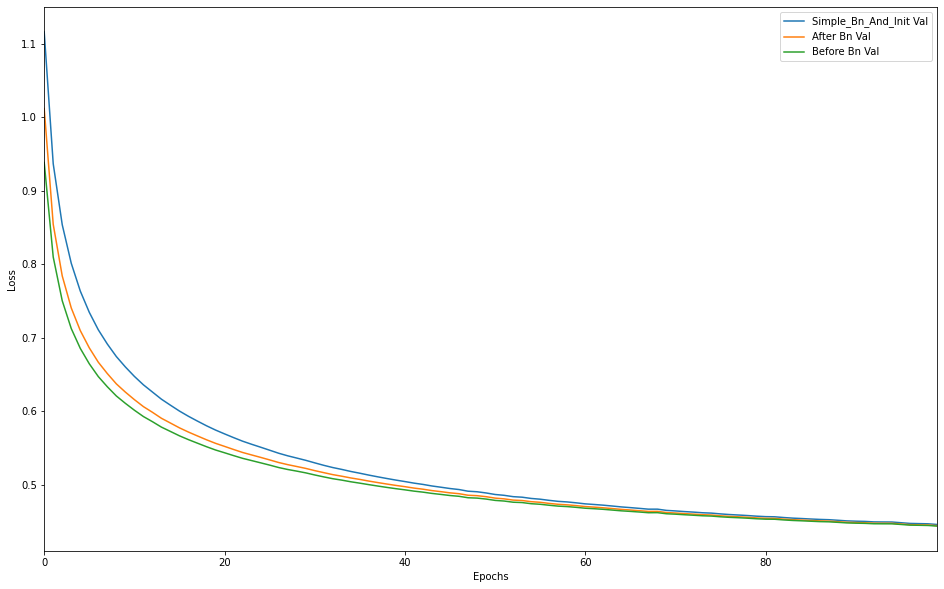

In [36]:
plot_history([('simple_BN_and_init', history_simple_BN_and_init),
              ('After BN',   history_complex_first),
              ('Before BN',   history_complex_second)
             ],
             start=0)

#### Более интересная часть - кастомизация
В keras уже есть несколько удобных callback.

In [39]:
from tensorflow.keras.callbacks import EarlyStopping,LearningRateScheduler,ReduceLROnPlateau,ModelCheckpoint,TensorBoard

In [38]:
EarlyStopping # останавливает обучение если наша метрика не меняет n эпох
LearningRateScheduler # меняет наш learning_rate по расписанию
ReduceLROnPlateau # понижает на LR если не происходит улучшения
ModelCheckpoint # сохраняет нашу лучшую модель
TensorBoard # Хорошая отрисовка модели

tensorflow.python.keras.callbacks.ModelCheckpoint

In [43]:
early_stop = EarlyStopping(patience=3)
reduce_on_plateau = ReduceLROnPlateau(patience=3)
# filepath="checkpoint_path/weights-improvement-{epoch:02d}-{val_categorical_accuracy:.2f}.hdf5"
filepath="checkpoint_path/weights-improvement.hdf5"
model_checkpoing = ModelCheckpoint(filepath,
                                   save_best_only=True,
                                  save_weights_only=True)

In [44]:
def create_simple_model():
    model = Sequential(name = 'simple_model')
    model.add(L.Input(shape = (28,28))) 
    model.add(L.Flatten()) 
    model.add(L.Dense(100,  kernel_initializer='random_normal',name='First',activation='relu'))
    model.add(L.Dense(100,  kernel_initializer='random_normal',name='Second',activation='relu'))
    model.add(L.Dense(10, kernel_initializer = 'random_normal',name='Output',activation='softmax'))
    opt = keras.optimizers.Adam(learning_rate=1e-4) 
    model.compile(optimizer=opt,loss='categorical_crossentropy',
                 metrics=["categorical_accuracy"]) 
    return model


In [45]:

model = create_simple_model()

history = model.fit(X_train,y_train_ohe,batch_size=500,epochs=20,
                     validation_data = (X_val,y_val_ohe),
                    callbacks = [early_stop,reduce_on_plateau,model_checkpoing],verbose=0)


In [46]:
model.load_weights('checkpoint_path/weights-improvement.hdf5')

In [47]:
filepath="checkpoint_path/full_model_improvement.hdf5"
model_checkpoing = ModelCheckpoint(filepath,
                                   save_best_only=True,
                                  save_weights_only=False)
simple_model = create_simple_model()

history = simple_model.fit(X_train,y_train_ohe,batch_size=500,epochs=20,
                     validation_data = (X_val,y_val_ohe),
                    callbacks = [early_stop,reduce_on_plateau,model_checkpoing],verbose=0)


In [48]:
simple_model = keras.models.load_model(filepath)

In [49]:
simple_model.evaluate(x=X_val,y=y_val_ohe)

10000/10000 [==============================] - 0s 33us/sample - loss: 0.4337 - categorical_accuracy: 0.8469


[0.4336695870876312, 0.8469]

In [50]:
# Способ писать свои собственные callbacks
from tensorflow.keras import callbacks
 
class My_Callback(callbacks.Callback):     # Класс My_Callback унаследовал свойства класса Callback
    def on_train_begin(self, logs={}):           # Функция, которая выполняется в начале обучения 
        return
 
    def on_train_end(self, logs={}):             # Функция, которая выполняется в конце обучения 
        return
 
    def on_epoch_begin(self, logs={}):           # В начале каждой эпохи 
        return
 
    def on_epoch_end(self, epoch, logs={}): 
        # В конце каждой эпохи
        return
 
    def on_batch_begin(self, batch, logs={}):    # В начале батча
        return
 
    def on_batch_end(self, batch, logs={}):      # В конце батча 
        return

In [51]:
from tensorflow.keras import callbacks

class Printlogs(callbacks.Callback):

    def on_epoch_end(self, epoch, logs):
        if epoch==10:
            print(logs)
            self.model
        

In [52]:
simple_model = create_simple_model()
our_callback = Printlogs()

In [53]:
history = simple_model.fit(X_train,y_train_ohe,batch_size=500,epochs=20,
                     validation_data = (X_val,y_val_ohe),
                    callbacks = [our_callback],
                           verbose=0)

{'loss': 0.4867748203873634, 'categorical_accuracy': 0.83444, 'val_loss': 0.4964317068457603, 'val_categorical_accuracy': 0.8281}


In [62]:
simple_model.metrics[0]()

In [63]:
prediction = simple_model.predict(X_val)

In [68]:
np.argmax(prediction,axis=1)

array([2, 2, 7, ..., 2, 5, 7], dtype=int64)

In [70]:
np.argmax(y_val_ohe,axis=1)

array([8, 8, 7, ..., 1, 5, 7], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(np.argmax(y_val_ohe,axis=1),np.argmax(prediction,axis=1))

0.3433

In [54]:
import numpy as np
# Напишем изменение скорости обучения
INIT_LR=0.1
# Стратегия для понижения скорости
def lr_scheduler(epoch):
    drop = 0.5
    epochs_drop = 1.0
    lrate = INIT_LR * np.math.pow(drop, np.math.floor((epoch)/epochs_drop))
    return lrate

lrate = LearningRateScheduler(lr_scheduler)
# класс чтобы отслеживать бесчинства
class Print_lr(callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print(float(tf.keras.backend.get_value(self.model.optimizer.lr)))
        # чтобы установить свой LR надо указать
        # LR_OUR = ....
        # tf.keras.backend.set_value(self.model.optimizer.lr, LR_OUR)


simple_model = create_simple_model()
history = simple_model.fit(X_train,y_train_ohe,batch_size=500,epochs=20,
                     validation_data = (X_val,y_val_ohe),
                    callbacks = [lrate,Print_lr()],
                           verbose=0)


0.10000000149011612
0.05000000074505806
0.02500000037252903
0.012500000186264515
0.0062500000931322575
0.0031250000465661287
0.0015625000232830644
0.0007812500116415322
0.0003906250058207661
0.00019531250291038305
9.765625145519152e-05
4.882812572759576e-05
2.441406286379788e-05
1.220703143189894e-05
6.10351571594947e-06
3.051757857974735e-06
1.5258789289873675e-06
7.629394644936838e-07
3.814697322468419e-07
1.9073486612342094e-07


In [79]:
# класс чтобы отслеживать бесчинства

# Посчитаем дельту в val_metric после каждой эпохи
class Print_delta_metrics(callbacks.Callback):
    def __init__(self,X_val,y_val_ohe):
        self.X_val = X_val
        self.y_val_ohe = y_val_ohe
        
    def on_epoch_begin(self, epoch, logs):
        self.metric_start = self.model.evaluate(self.X_val,self.y_val_ohe)
        
    def on_epoch_end(self, epoch, logs):
        self.metric_end = self.model.evaluate(self.X_val,self.y_val_ohe)
        print(f'Delta metric on {epoch} equal {-self.metric_end[1]+self.metric_start[1]}')
        print(f'Delta loss on {epoch} equal {-self.metric_end[0]+self.metric_start[0]}')
       


In [80]:
our_callback = Print_delta_metrics(X_val,y_val_ohe)
# our_callback.X_val

In [81]:
simple_model = create_simple_model()
history = simple_model.fit(X_train,y_train_ohe,batch_size=500,epochs=20,
                     validation_data = (X_val,y_val_ohe),
                    callbacks = [our_callback],
                           verbose=0)

10000/10000 [==============================] - 0s 24us/sample - loss: 1.5405 - categorical_accuracy: 0.6349
Delta metric on 0 equal -0.53329998254776
Delta loss on 0 equal 0.7620090757369997
10000/10000 [==============================] - 0s 25us/sample - loss: 0.9658 - categorical_accuracy: 0.6797
Delta metric on 1 equal -0.0448000431060791
Delta loss on 1 equal 0.5746774916648865
10000/10000 [==============================] - 0s 27us/sample - loss: 0.7895 - categorical_accuracy: 0.7128
Delta metric on 2 equal -0.033100008964538574
Delta loss on 2 equal 0.17637987136840816
10000/10000 [==============================] - 0s 26us/sample - loss: 0.7011 - categorical_accuracy: 0.7504
Delta metric on 3 equal -0.03759998083114624
Delta loss on 3 equal 0.08837961397171024
10000/10000 [==============================] - 0s 26us/sample - loss: 0.6411 - categorical_accuracy: 0.7764
Delta metric on 4 equal -0.026000022888183594
Delta loss on 4 equal 0.059987267017364454
10000/10000 [===============

In [ ]:
# Давайте заставим модель посчитать метрики каждую эпоху, как пример
# Считать будем на X_val, y_val
# Посчитаем дельту в val_loss после каждой эпохи
# Посчитать через sklearn

### Кастомные loss и метрики
Что уже есть
https://keras.io/api/metrics/

https://keras.io/api/losses/

In [82]:
celsius    = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
fahrenheit = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

In [83]:


model = Sequential()
model.add(L.Dense(1))

opt = tf.keras.optimizers.Adam( )

model.compile(loss='mse', optimizer=opt)
model.fit(celsius, fahrenheit,  epochs=3, verbose=1)



Train on 7 samples
Epoch 1/3
7/7 [==============================] - 0s 30ms/sample - loss: 2779.0374
Epoch 2/3
7/7 [==============================] - 0s 142us/sample - loss: 2776.9531
Epoch 3/3
7/7 [==============================] - 0s 142us/sample - loss: 2774.8699


In [84]:
def custom_loss_function(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    return tf.reduce_mean(squared_difference, axis=-1)

In [85]:
%%time
model = Sequential()
model.add(L.Dense(1))

opt = tf.keras.optimizers.Adam( )

model.compile(loss=custom_loss_function, optimizer=opt)
model.fit(celsius, fahrenheit,  epochs=3,verbose=1)



Train on 7 samples
Epoch 1/3
7/7 [==============================] - 0s 36ms/sample - loss: 1132.2122
Epoch 2/3
7/7 [==============================] - 0s 143us/sample - loss: 1131.5636
Epoch 3/3
7/7 [==============================] - 0s 143us/sample - loss: 1130.9163
Wall time: 312 ms


In [97]:
## тоже самое можно делать и с метриками. Также можно следить сразу за несколькими метриками, что бывает полезно.
## Если хотим добавить совсем сложную логику то мы это будем делать через callback

В этой тетрадке немного поработаем с градусами по цельсию и фаренгейту! Снова попробуем восстановить формулу 

$$ f = c \times 1.8 + 32 $$

In [86]:
## возьмем срезы
tf.keras.backend.set_floatx('float64')
model = Sequential()
model.add(L.Dense(1,name='our_neural'))

opt = tf.keras.optimizers.Adam(0.1 )

model.compile(loss='mse', optimizer=opt)
model.fit(celsius, fahrenheit,  epochs=600, verbose=0)



In [197]:
# maxx_final = np.array([0.])
# for i in range(first_layer.variables[0].shape[0]):
#     mmax = np.max(first_layer.variables[0][i])
#     maxx_final = np.max([maxx_final,mmax])

In [131]:
maxx_final

0.26849318

In [105]:
# simple_model.summary()

In [87]:
## элементарная задача, но из-за того, что данные не скалированы сходились вечность
our_layer = model.get_layer(name='our_neural')
our_layer.variables

[<tf.Variable 'sequential_2/our_neural/kernel:0' shape=(1, 1) dtype=float64, numpy=array([[1.81017952]])>,
 <tf.Variable 'sequential_2/our_neural/bias:0' shape=(1,) dtype=float64, numpy=array([30.52181683])>]

In [112]:
our_layer(np.array(celsius).reshape((7,1))) ## Берем прогнозы от слоя

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[-41.88536396],
       [ 12.42002163],
       [ 30.52181683],
       [ 45.00325299],
       [ 57.67450963],
       [ 70.34576626],
       [ 99.30863858]])>

In [106]:
X = tf.constant(np.array(celsius).reshape((7,1)))

In [109]:
W = our_layer.variables[0]
b = our_layer.variables[1]

In [110]:
X@W+b

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[-41.88536396],
       [ 12.42002163],
       [ 30.52181683],
       [ 45.00325299],
       [ 57.67450963],
       [ 70.34576626],
       [ 99.30863858]])>

 Есть понимание, как взять определить в callback на какой эпохе мы получили правильное значение весов? Проверить как ведет себя наша нейронка? (с учетом того, что мы точно знаем формулу)
 Ну и заодно быстро проверить гипотезу - а поможет ли нам batchnorm в данной ситуации?

### Hometask
1. Взять значение параметров и сравнить их с эталонными. Если разница в значениях меньше эпсилон (вы сами задаете), то считаем, что модель научилась
(Взять значение параметров - взять слой от модели и взять значения в этом слое)
2. Вывести номер эпохи, когда разница в значениях стала меньше эпсилон
3. Повторить упражнение для модели с BN.

### Пишем класс нейронки с TF и keras вместе

In [132]:
# транспонировали выборку
x_train = celsius[:,None]
y_train = fahrenheit[:,None]

In [174]:
tf.keras.backend.set_floatx('float64')
class Super_puper_neural_net(keras.Model):
    
    def __init__(self, n_hidden_neurons):
        super(Super_puper_neural_net, self).__init__()
        self.fc1 = L.Dense(n_hidden_neurons, kernel_initializer='glorot_uniform',
                           activation='sigmoid', trainable=True)
        self.fc2 = L.Dense(n_hidden_neurons, kernel_initializer='glorot_uniform',
                           trainable=True)

    def encode(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [179]:
model_super = Super_puper_neural_net(1)
model_super.encode(x_train)

<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
array([[-1.61442909e+00],
       [-1.61436408e+00],
       [-8.07214544e-01],
       [-4.91885342e-04],
       [-4.12549632e-07],
       [-3.45904655e-10],
       [-3.21300131e-17]])>

In [180]:
# Ошибка для модели
def mean_square(y_pred, y_true):
    return tf.reduce_mean((y_pred-y_true)**2)

# оптимизатор 
optimizer = tf.optimizers.SGD(learning_rate=0.001)

# процесс оптимизации
def model_train(X, Y):

    # находим loss и пробрасываем градиент
    with tf.GradientTape() as g:
        pred = model_super.encode(X)
        loss = mean_square(pred, Y)

    # Вычисляем градиенты
    gradients = g.gradient(loss, model_super.variables)
    
    # Обновляем веса a и b в ходе одной итерации спуска 
    optimizer.apply_gradients(zip(gradients, model_super.variables))

In [181]:
#Обучение
epochs = 1000 # число эпох 

for i in range(epochs):
    
    # Делаем щаг градиентного спуска 
    model_train(x_train, y_train)
    
    # Каждую сотую итерацию следим за тем, что произошло
    if i%100 == 0:
        y_pred = model_super.encode(x_train)
        loss_val = mean_square(y_pred, y_train)
        print("step: %i, loss: %f" % (i, loss_val))

step: 0, loss: 3361.065988
step: 100, loss: 2802.970525
step: 200, loss: 2415.673370
step: 300, loss: 2138.322237
step: 400, loss: 1933.152573
step: 500, loss: 1776.198660
step: 600, loss: 1651.963504
step: 700, loss: 1550.323372
step: 800, loss: 1464.599027
step: 900, loss: 1390.299435


#  Свой слой на Tensorflow для Keras

Новые слои можно писать на основе керасовского класса `Layer`. Если прописать `help(tf.keras.layers.Layer)`, можно почитать про него. Если в кратце, нужно реализовать три части: 

* Конструктор, в нём мы описываем гиперпараметры 
* Метод `build`, в которм мы описываем все переменные 
* Метод `call`, который делает forward pass

In [182]:
class MyLinear(L.Layer):
    
    # Задаём консруктор 
    def __init__(self, units=32):
        super(MyLinear, self).__init__()  # чтобы коректно унаследовались методы
        self.units = units                # число нейронов

    def build(self, input_shape):
        # add_weight внутри build то же самое что и Variable, но совместимо с Keras
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal', 
                                 trainable=True)
        
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal', 
                                 trainable=True)

    # Применение 
    def call(self, inputs):
        # сразу делаем и линейное преобразование и ReLU (а почему бы и нет)
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b) 

In [183]:
model_custom = Sequential(name = 'simple_model')
model_custom.add(L.Input(shape = (28,28))) 
model_custom.add(L.Flatten()) 
model_custom.add(L.Dense(100,  kernel_initializer='random_normal',name='First',activation='relu'))
model_custom.add(MyLinear()) ### Самый красивый слой
model_custom.add(L.Dense(10, kernel_initializer = 'random_normal',name='Output',activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=1e-4) 
model_custom.compile(optimizer=opt,loss='categorical_crossentropy',
             metrics=["categorical_accuracy"]) 

In [184]:
history = model_custom.fit(X_train,y_train_ohe,batch_size=500,epochs=20,
                     validation_data = (X_val,y_val_ohe),
                    callbacks = [early_stop,reduce_on_plateau],verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 1s 24us/sample - loss: 2.1697 - categorical_accuracy: 0.4019 - val_loss: 1.9278 - val_categorical_accuracy: 0.4937
Epoch 2/20
50000/50000 [==============================] - 1s 15us/sample - loss: 1.5984 - categorical_accuracy: 0.5277 - val_loss: 1.3151 - val_categorical_accuracy: 0.5501
Epoch 3/20
50000/50000 [==============================] - 1s 15us/sample - loss: 1.1363 - categorical_accuracy: 0.6411 - val_loss: 1.0176 - val_categorical_accuracy: 0.6572
Epoch 4/20
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9295 - categorical_accuracy: 0.6776 - val_loss: 0.8787 - val_categorical_accuracy: 0.6768
Epoch 5/20
50000/50000 [==============================] - 1s 16us/sample - loss: 0.8209 - categorical_accuracy: 0.7014 - val_loss: 0.7971 - val_categorical_accuracy: 0.7037
Epoch 6/20
50000/50000 [==============================] - 1s 16us/sample - loss: 0.75

KeyboardInterrupt: 

Ну и нам остался пример, как взять срез модели. Посмотреть прогнозы в середине

In [188]:
model = create_simple_model()

In [189]:
model.summary()

Model: "simple_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
First (Dense)                (None, 100)               78500     
_________________________________________________________________
Second (Dense)               (None, 100)               10100     
_________________________________________________________________
Output (Dense)               (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [190]:
history = model.fit(X_train,y_train_ohe,batch_size=500,epochs=20,
                     validation_data = (X_val,y_val_ohe),
                    callbacks = [early_stop,reduce_on_plateau],verbose=0)

In [191]:
# Извлекаем выходы верхних 2х слоев
layer_outputs = [layer.output for layer in model.layers[1:3]]
# создаем модель, которая вернет эти выходы с учетом заданнаго входа
activation_model = keras.Model(inputs=model.input, outputs=layer_outputs)

In [192]:
prediction = activation_model.predict(X_val)

In [196]:
prediction

[array([[4.37023959, 1.23396861, 3.51238532, ..., 4.16693784, 1.81672091,
         2.20411849],
        [6.94814981, 1.14500814, 5.27569097, ..., 2.09566685, 3.48258068,
         1.07524494],
        [1.07620763, 1.94087692, 0.15785509, ..., 0.25897033, 0.47017189,
         0.33243196],
        ...,
        [4.68589903, 2.05222942, 1.8294265 , ..., 0.        , 2.08374841,
         0.32991082],
        [1.21789699, 0.89316549, 1.37696869, ..., 1.17656514, 0.74840467,
         0.64089733],
        [1.09191236, 1.73304391, 1.22410031, ..., 1.06005862, 0.45346914,
         0.99722246]]),
 array([[6.41297614, 4.0618314 , 5.14493456, ..., 0.        , 1.85787004,
         2.21333011],
        [8.37848403, 0.73636084, 5.23691613, ..., 0.        , 0.        ,
         5.53890122],
        [1.40693001, 4.11016869, 3.42238888, ..., 0.        , 0.40670065,
         0.31541483],
        ...,
        [0.81557945, 1.4955361 , 0.        , ..., 0.        , 4.38391012,
         0.        ],
        [3.0

In [194]:
layer_outputs

[<tf.Tensor 'First_11/Identity:0' shape=(None, 100) dtype=float64>,
 <tf.Tensor 'Second_9/Identity:0' shape=(None, 100) dtype=float64>]

 Что сегодня не вошло - как переопределить градиенты для своих слоев (на уровне keras очень геморойно, если уже занимаетесь этим то вряд ли пишете на верхнеуровневом фраемворке)
Как работать с уже готовыми и обучеными моделями, дофичивать нейронки по кусочкам. Но это уже в следующих сериях :)

